# DataScientest - SalesData Project
Last Updated: 20.06.2023

## 1. Data import & first analysis
#### 1.1 Import of all neccesarry modules

In [230]:
# Append new Modules here:    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns   
#CH Have to import requests
import requests

#### 1.2 Import of df and first informations

Further descriptions of the columns and rows can be found in __[SalesData-Description.xlsx](https://bdae0-my.sharepoint.com/:x:/r/personal/jonathan_leipold_bdae-gruppe_de/Documents/DataScientest/Sales-Project/SalesData-Description.xlsx?d=wc46862516c97407cbb63550cda70df39&csf=1&web=1&e=HffTcl)__

In [231]:
#import df. set encoding to 'latin-1' necassary to fit to csv-file
df = pd.read_csv('SalesDate-Example.csv',encoding='latin-1')

pd.set_option('display.max_columns', None) #allow display of all columns
df.head()

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName
0,P,P,Bezahlt,1956-03-12,DE,62,1,2018-08-01,2018-08-31,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen
1,P,P,Bezahlt,1956-03-12,DE,62,1,2018-10-01,2018-10-31,2017-08-01,2019-07-31,83.0,33.2,40%,p16174,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,100,Produkte
2,P,P,Bezahlt,1956-03-12,DE,62,1,2018-11-01,2018-11-30,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen
3,P,S,Storniert,1979-08-25,DE,39,2,2018-11-01,2018-11-30,2016-11-01,2018-01-31,83.0,33.2,40%,p13934,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,CN,China,100,Produkte
4,P,P,Bezahlt,1986-02-04,FR,32,1,2018-03-01,2018-03-31,2016-05-01,2018-12-31,83.0,33.2,40%,p12569,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,SG,Singapore,100,Produkte


#### 1.3 Column Informations:

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230010 entries, 0 to 230009
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Indicator            230010 non-null  object 
 1   status_code          230010 non-null  object 
 2   status_name          230010 non-null  object 
 3   BirthDate            230010 non-null  object 
 4   Nation               228444 non-null  object 
 5   AgeAtPremium         230010 non-null  int64  
 6   PolicyAgeAtPremium   230010 non-null  int64  
 7   premium_startDate    230010 non-null  object 
 8   premium_endDate      230010 non-null  object 
 9   policy_StartDate     230010 non-null  object 
 10  policy_EffEndDate    230010 non-null  object 
 11  premiumAmount        230010 non-null  float64
 12  FeeAmount            230010 non-null  float64
 13  feeRate              229984 non-null  object 
 14  ContractID           230010 non-null  object 
 15  product_code     

<div class="alert alert-block alert-info">
<b>Observation:</b>date columns have dtype 'object' --> change to datetime
</div>

- Therefore we wrote a function called 'convert_columns_to_datetime' and put it into the 'helpers.py' file in the same notebook
- This way the main notebook stays more clear
- Other helpers functions will follow

In [233]:
from helpers import convert_columns_to_datetime
#help(convert_columns_to_datetime) #Description of the function -> uncomment, if needed

In [234]:
columns_to_convert = ['BirthDate','premium_startDate', 'premium_endDate', 'policy_StartDate', 'policy_EffEndDate']

df = convert_columns_to_datetime(df, columns_to_convert)
print(df.dtypes)
df.head()

Indicator                      object
status_code                    object
status_name                    object
BirthDate              datetime64[ns]
Nation                         object
AgeAtPremium                    int64
PolicyAgeAtPremium              int64
premium_startDate      datetime64[ns]
premium_endDate        datetime64[ns]
policy_StartDate       datetime64[ns]
policy_EffEndDate      datetime64[ns]
premiumAmount                 float64
FeeAmount                     float64
feeRate                        object
ContractID                     object
product_code                   object
MainProductCode                object
MainProductName                object
Deductible                    float64
CmpPrivate                     object
Model                           int64
Zone                            int64
ZoneDesc                       object
premium_Country                object
premium_CountryName            object
product_group                   int64
product_grou

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName
0,P,P,Bezahlt,1956-03-12,DE,62,1,2018-08-01,2018-08-31,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen
1,P,P,Bezahlt,1956-03-12,DE,62,1,2018-10-01,2018-10-31,2017-08-01,2019-07-31,83.0,33.2,40%,p16174,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,100,Produkte
2,P,P,Bezahlt,1956-03-12,DE,62,1,2018-11-01,2018-11-30,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen
3,P,S,Storniert,1979-08-25,DE,39,2,2018-11-01,2018-11-30,2016-11-01,2018-01-31,83.0,33.2,40%,p13934,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,CN,China,100,Produkte
4,P,P,Bezahlt,1986-02-04,FR,32,1,2018-03-01,2018-03-31,2016-05-01,2018-12-31,83.0,33.2,40%,p12569,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,SG,Singapore,100,Produkte


#### 1.4 Description of numerical columns:

In [235]:
df.describe()

,BirthDate,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,Deductible,Model,Zone,product_group
count,230010,230010.000000,230010.000000,230010,230010,230010,230010,230010.000000,230010.000000,230010.0,230010.000000,230010.000000,230010.000000
mean,1979-02-12 01:35:16.426242336,39.724521,1.104213,2019-05-04 19:14:29.503065088,2019-06-03 05:31:40.435632896,2017-10-14 11:12:15.025433856,2021-01-12 01:24:42.728577024,69.794634,27.769139,0.0,1003.744094,1005.093796,100.088692
min,1948-01-10 00:00:00,-1.000000,-1.000000,2014-11-01 00:00:00,2014-11-30 00:00:00,2013-03-01 00:00:00,2014-07-31 00:00:00,-425.000000,-165.750000,0.0,1001.000000,-1.000000,100.000000
25%,1967-04-05 00:00:00,30.000000,0.000000,2017-04-01 00:00:00,2017-04-30 00:00:00,2015-08-01 00:00:00,2018-08-31 00:00:00,79.000000,31.600000,0.0,1001.000000,1002.000000,100.000000
50%,1979-04-04 00:00:00,39.000000,1.000000,2019-05-01 00:00:00,2019-05-31 00:00:00,2017-08-13 12:00:00,2020-10-31 00:00:00,83.000000,33.200000,0.0,1001.000000,1004.000000,100.000000
75%,1988-11-09 00:00:00,52.000000,2.000000,2021-07-01 00:00:00,2021-07-31 00:00:00,2020-01-01 00:00:00,2023-01-31 00:00:00,88.000000,35.200000,0.0,1008.000000,1009.000000,100.000000
max,2023-01-25 00:00:00,66.000000,4.000000,2023-12-01 00:00:00,2023-12-31 00:00:00,2023-08-30 00:00:00,2028-07-31 00:00:00,425.000000,165.750000,0.0,1008.000000,1010.000000,102.000000
std,NaN,14.845829,1.273986,NaN,NaN,NaN,NaN,61.198797,24.342121,0.0,3.417405,11.147499,0.411726


<div class="alert alert-block alert-info">
<b>Observation:</b> Deductible has only value 0 (this is due to the fact, that we only look at one product and that this product offers only deuctible = 0).
</div>

#### 1.5 Evaluation of NaN-Values
columns with NaN-values: Nation (= Nationality), Premium_Country(Name), feeRate
--> check Nation & Country first

In [236]:
#Nation
df['Nation'].value_counts(dropna=False)
NaN_Nations = df['Nation'].isna().sum()/len(df)
print('Part of NaN-values in Nation column = {:.1%}'.format(NaN_Nations))

#have a look on rows with NaN Nations
df[df['Nation'].isna() == True]

Part of NaN-values in Nation column = 0.7%


,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName
346,P,P,Bezahlt,1963-04-16,NaN,54,3,2018-02-01,2018-02-28,2014-10-01,2019-09-30,83.0,33.20,40%,p7599,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,ES,Spain,100,Produkte
347,P,P,Bezahlt,1963-04-16,NaN,55,3,2018-05-01,2018-05-31,2014-10-01,2019-09-30,83.0,33.20,40%,p7599,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,ES,Spain,100,Produkte
348,P,P,Bezahlt,1963-04-16,NaN,55,3,2018-08-01,2018-08-31,2014-10-01,2019-09-30,83.0,33.20,40%,p7599,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,ES,Spain,100,Produkte
985,P,P,Bezahlt,1978-04-04,NaN,40,0,2018-12-01,2018-12-31,2018-02-01,2020-05-31,79.0,31.60,40%,p16831,Q055.001.000,G007,Product6,0.0,I,1001,1004,Deutschland,DE,Germany,100,Produkte
1035,P,P,Bezahlt,1978-04-04,NaN,40,0,2018-10-01,2018-10-31,2018-02-01,2020-05-31,79.0,31.60,40%,p16831,Q055.001.000,G007,Product6,0.0,I,1001,1004,Deutschland,DE,Germany,100,Produkte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228190,P,P,Bezahlt,1959-01-07,NaN,63,0,2022-05-01,2022-05-31,2022-01-01,2022-05-31,-97.0,-37.83,39%,p29844,Q055.006.000,G007,Product6,0.0,I,1008,1009,Ohne USA / CAN / CH,BR,Brazil,100,Produkte
228546,P,P,Bezahlt,1961-06-15,NaN,59,0,2021-04-01,2021-04-30,2020-11-01,2025-10-31,88.0,35.20,40%,p25935,Q055.006.000,G007,Product6,0.0,I,1008,1009,Ohne USA / CAN / CH,TH,Thailand,100,Produkte
228547,P,P,Bezahlt,1961-06-15,NaN,60,0,2021-07-01,2021-07-31,2020-11-01,2025-10-31,88.0,35.20,40%,p25935,Q055.006.000,G007,Product6,0.0,I,1008,1009,Ohne USA / CAN / CH,TH,Thailand,100,Produkte
228548,P,P,Bezahlt,1961-06-15,NaN,60,0,2021-10-01,2021-10-31,2020-11-01,2025-10-31,88.0,35.20,40%,p25935,Q055.006.000,G007,Product6,0.0,I,1008,1009,Ohne USA / CAN / CH,TH,Thailand,100,Produkte


**Idea:** Built function to further analyse rows with NaN values in specific input column and run on columns above
1. Output: Compare to the rest of df by graphs to might recognize similarities (premium Country / policy_StartDate / CmpPrivate / ...) 
2. if not: Set to dummie value 'XX' to keep rest of rows informations

In [237]:
#Import Function from helpers.py
from helpers import NaN_col_info
#help(NaN_col_info) #uncomment for disctiption, if neccesarry

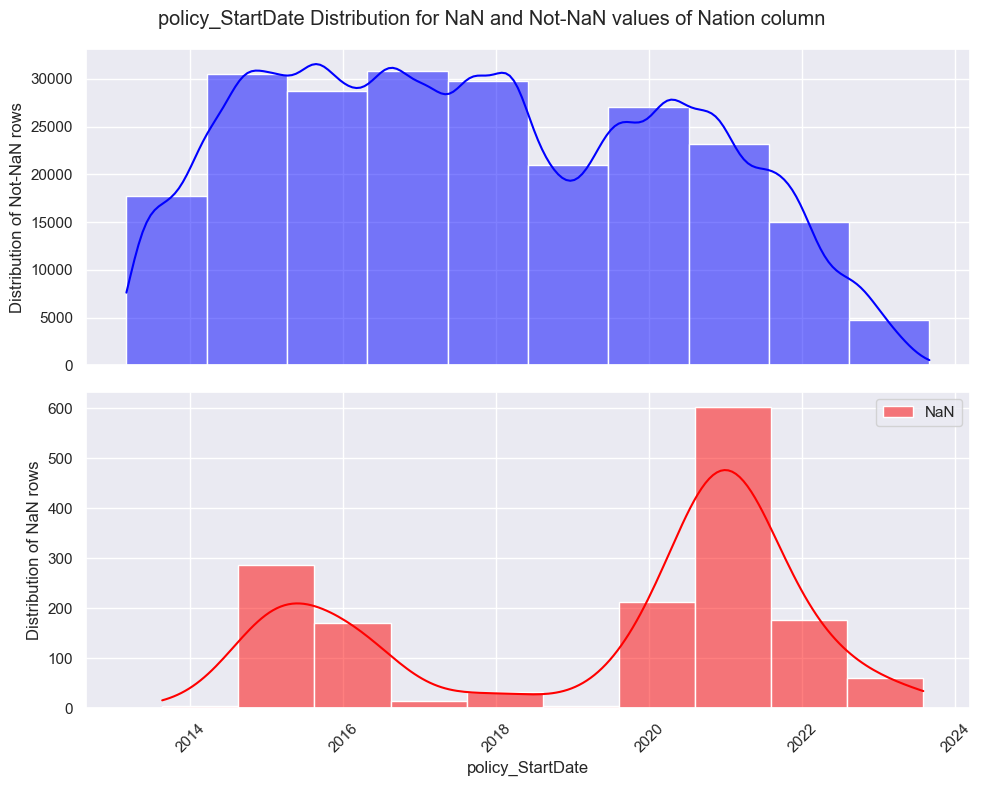

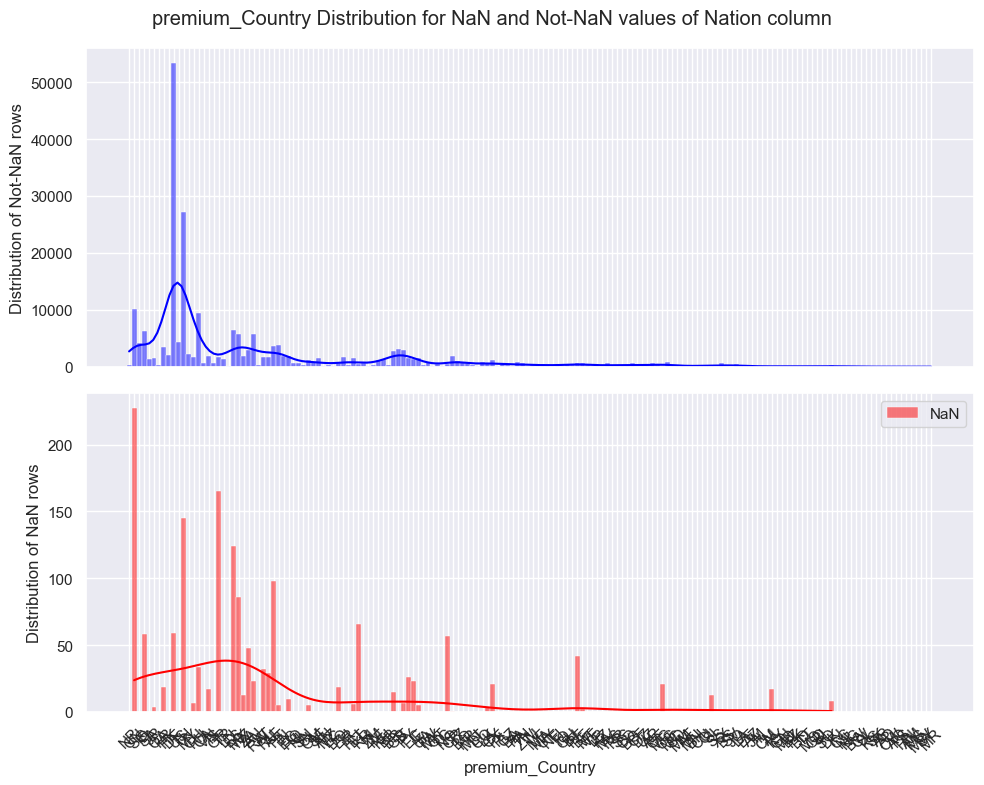

In [238]:
#NaN_col_info(df, 'Nation','premium_startDate')
NaN_col_info(df, 'Nation','policy_StartDate')
#NaN_col_info(df, 'Nation','premiumAmount')
NaN_col_info(df, 'Nation','premium_Country')

Alternative function to plot both distributions in 1 plot, one for each input columns

In [239]:
from helpers import plot_distributions

In [240]:
#example
nan_col = 'Nation'
comp_cols = ['premium_Country','policy_StartDate']  # Add other columns as needed
#plot_distributions(df, nan_col, comp_cols)

<div class="alert alert-block alert-info">
<b>Observation:</b> 
<ul>
    <li>Missing value in Nation column are more likely in recent policies / premiums.</li>
    <li>Distribution of premium Country is different for NaN-Nations, but too many countries for comparison. </li> 
</ul>
</div>

A closer look on relplot betwwen nation & premiumCountry is difficult due to too many countries. <br>
As well too many values for discriptive column to later create dummy-values for modelling.

<div class="alert alert-block alert-warning">
<b>Therefore: Create Clusters of Regions and map the countries to it's regions.</b><br>
(Special Features: 'DE' as seperate region (because most commmon) and 'XX' (because = unknown))
</div>

import 2 functions to get unique country names and map them to their corresponding region

In [241]:
from helpers import get_unique_values, generate_country_region_mapping

1. get unqiue countries

In [242]:
unique_countries = get_unique_values(df, columns=['Nation', 'premium_Country'])

2. map regions

In [243]:
country_mapping = generate_country_region_mapping(unique_countries)
print("Country to Region Mapping of DE:", country_mapping['DE']) #test

Country to Region Mapping of DE: DE


3. create new columns in df

In [244]:
df['Nation_region'] = df['Nation'].map(country_mapping)
print(df[['Nation','Nation_region']]['Nation_region'].value_counts(dropna=False),'\n')

df['premiumCountry_region'] = df['premium_Country'].map(country_mapping)
print(df[['premium_Country','premiumCountry_region']]['premiumCountry_region'].value_counts(dropna=False))

Nation_region
DE          140291
Europe       71580
Asia          7888
Americas      6278
NaN           1566
Africa        1363
Oceania       1044
Name: count, dtype: int64 

premiumCountry_region
Asia        82486
DE          53383
Europe      40693
Americas    26552
Africa      15626
Oceania      7832
NaN          2724
XX            712
Polar           2
Name: count, dtype: int64


<div class="alert alert-block alert-info">
    Idea: Set NaN to 'XX' in both colums.
</div>

In [245]:
#fill NaN values with 'XX'
df[['Nation','Nation_region','premium_Country','premiumCountry_region']] = df[['Nation','Nation_region','premium_Country','premiumCountry_region']].fillna('XX')

#check result
print(df[['Nation','Nation_region']]['Nation_region'].value_counts(dropna=False),'\n')
print(df[['premium_Country','premiumCountry_region']]['premiumCountry_region'].value_counts(dropna=False))

Nation_region
DE          140291
Europe       71580
Asia          7888
Americas      6278
XX            1566
Africa        1363
Oceania       1044
Name: count, dtype: int64 

premiumCountry_region
Asia        82486
DE          53383
Europe      40693
Americas    26552
Africa      15626
Oceania      7832
XX           3436
Polar           2
Name: count, dtype: int64


#### show new df

In [246]:
df.head()

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName,Nation_region,premiumCountry_region
0,P,P,Bezahlt,1956-03-12,DE,62,1,2018-08-01,2018-08-31,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen,DE,Asia
1,P,P,Bezahlt,1956-03-12,DE,62,1,2018-10-01,2018-10-31,2017-08-01,2019-07-31,83.0,33.2,40%,p16174,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,100,Produkte,DE,Asia
2,P,P,Bezahlt,1956-03-12,DE,62,1,2018-11-01,2018-11-30,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen,DE,Asia
3,P,S,Storniert,1979-08-25,DE,39,2,2018-11-01,2018-11-30,2016-11-01,2018-01-31,83.0,33.2,40%,p13934,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,CN,China,100,Produkte,DE,Asia
4,P,P,Bezahlt,1986-02-04,FR,32,1,2018-03-01,2018-03-31,2016-05-01,2018-12-31,83.0,33.2,40%,p12569,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,SG,Singapore,100,Produkte,Europe,Asia


## Still ToDo

<div class="alert alert-block alert-success">
<b>Main preprocessing Goal:</b> Create df where rows are crouped by Months.<br>
     Therefore we need:
    <ul>
        <li>a "Month" column with MM-YYY</li>  
        <li>create our <b> target value(s):</b> sum premiumAmmount, count ContractID </li>
        <li>to decide what to do with other columns</li>   
    </ul>
</div>

<div class="alert alert-block alert-warning">
<b>Next Step for understanding:</b> premiumStart & -End always in the same month? --> check duration of premium Payments
<ol>
<li> create column with premiumDuration = premium_endDate-premium_StartDate </li> 
<li> value_counts of new premiumDuration </li> 
</ol>
    
Then find out how rows can be grouped by month.
</div>

<div class="alert alert-block alert-warning">
<b>Then:</b> Check behaviour of "Storniert" Status
<ol>
<li> Take Example ContractIDs with 'status_code' = 'S' and see how it behaves compared to 'P'. </li> 
<li> Decide how to handle it when grouping premiums. </li> 
</ol>
</div>

<div class="alert alert-block alert-warning">
<b>Therefore:</b> Group lines in different ways as df and plot graphically
<ol>
    <li> by month -->  sum premiumAmount, count ContractID & decide for other columns if necessary (This will be our df for modelling). </li>
    <li> try different other groupings for overview (Nation_Region, ...) and explore diferences</li>
</ol>
</div>

## 2 Explorative Analyse Basic CH

In [247]:
df.head()

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName,Nation_region,premiumCountry_region
0,P,P,Bezahlt,1956-03-12,DE,62,1,2018-08-01,2018-08-31,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen,DE,Asia
1,P,P,Bezahlt,1956-03-12,DE,62,1,2018-10-01,2018-10-31,2017-08-01,2019-07-31,83.0,33.2,40%,p16174,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,100,Produkte,DE,Asia
2,P,P,Bezahlt,1956-03-12,DE,62,1,2018-11-01,2018-11-30,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen,DE,Asia
3,P,S,Storniert,1979-08-25,DE,39,2,2018-11-01,2018-11-30,2016-11-01,2018-01-31,83.0,33.2,40%,p13934,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,CN,China,100,Produkte,DE,Asia
4,P,P,Bezahlt,1986-02-04,FR,32,1,2018-03-01,2018-03-31,2016-05-01,2018-12-31,83.0,33.2,40%,p12569,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,SG,Singapore,100,Produkte,Europe,Asia


#### Countplot of the status_name

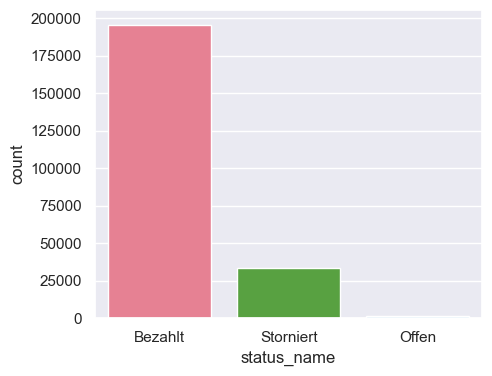

In [248]:
fig = plt.figure(figsize=(5,4))
sns.set()
sns.countplot(x='status_name',data=df,palette='husl')
plt.show;

#### Countplot of the Customer Nation

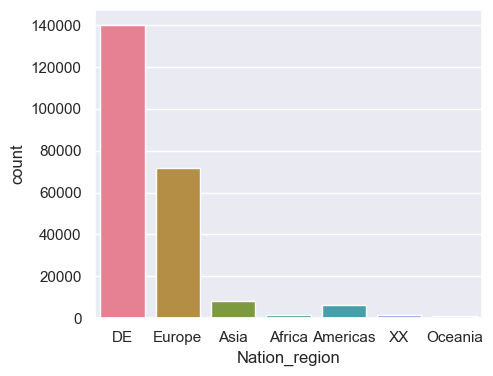

In [249]:
fig = plt.figure(figsize=(5,4))
sns.set()
sns.countplot(x='Nation_region',data=df,palette='husl')
plt.show;

#### Displot of the Age of the Customer

<Figure size 1000x400 with 0 Axes>

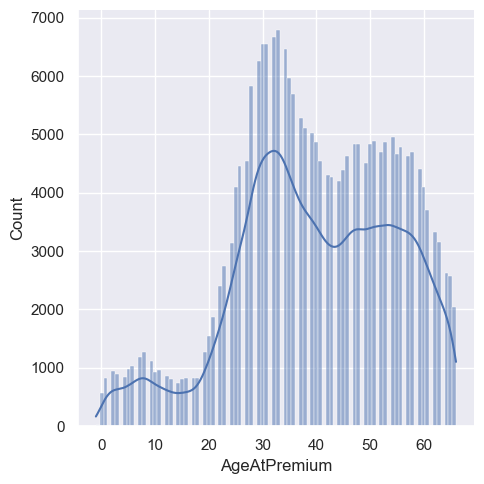

In [250]:
fig = plt.figure(figsize=(10,4))
sns.set()
sns.displot(x='AgeAtPremium',data=df,kde=True)
plt.show;

<div class="alert alert-block alert-warning">
Age of -1 ? 
</div>

#### Creating AgeGroups

In [251]:
bins = [0, 18, 30, 40, 50, 60, 70, float('inf')]
labels = ['<18', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Wende die 'cut'-Funktion an, um die Altersgruppen zu erstellen
df['AgeGroup'] = pd.cut(df['AgeAtPremium'], bins=bins, labels=labels, right=False)

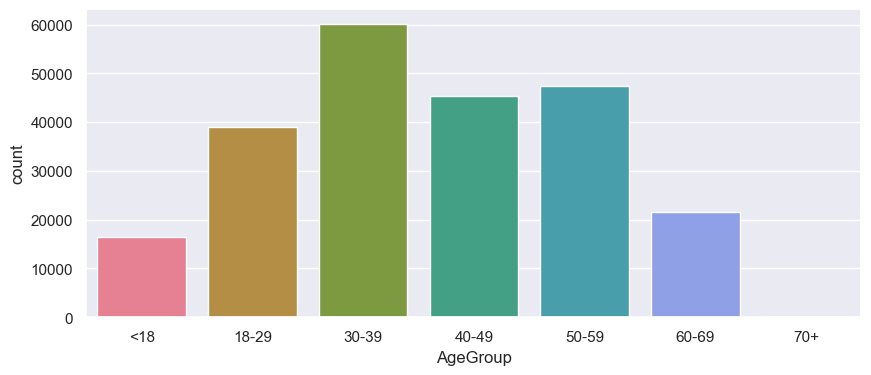

In [252]:
fig = plt.figure(figsize=(10,4))
sns.set()
sns.countplot(x='AgeGroup',data=df,palette='husl')
plt.show;

#### Days between premiumStartDate and premium AndDate

In [253]:
df['time_period'] = (df['premium_endDate'] - df['premium_startDate']).dt.days

In [254]:
df['time_period'].value_counts()

time_period
30    133058
29     78423
27     14209
28      4214
0         28
14        14
9          7
26         6
23         5
21         5
19         5
20         4
7          4
1          4
25         4
15         4
22         3
2          2
18         2
16         2
17         2
8          2
24         1
5          1
11         1
Name: count, dtype: int64

<div class="alert alert-block alert-warning">
First step. Only time_period > 26??
</div>

In [255]:
df['MonthYear'] = df['premium_startDate']

#### Deskriptive Analyse Groupby MonthYear

In [256]:
df.groupby('MonthYear')[['premiumAmount','FeeAmount']].describe()

premiumAmount                                                 \
                   count       mean        std    min   25%   50%   75%   
MonthYear                                                                 
2014-11-01        1451.0  73.281185  48.499632 -397.8  79.0  79.0  79.0   
2014-12-01        1493.0  72.503014  51.825643 -397.8  79.0  79.0  79.0   
2015-01-01        1514.0  72.383091  49.763975 -255.0  79.0  79.0  79.0   
2015-02-01        1557.0  72.668593  49.658971 -255.0  79.0  79.0  79.0   
2015-03-01        1664.0  70.725962  51.929370 -255.0  79.0  79.0  79.0   
...                  ...        ...        ...    ...   ...   ...   ...   
2023-08-01        1041.0  70.659942  66.150089 -425.0  97.0  97.0  97.0   
2023-09-01        1020.0  70.596078  66.318658 -425.0  97.0  97.0  97.0   
2023-10-01         996.0  70.544177  66.369008 -425.0  97.0  97.0  97.0   
2023-11-01         985.0  70.642640  66.261755 -425.0  97.0  97.0  97.0   
2023-12-01         974.0  70.794661  66.152701 -425.0  97.0  97.0  97.0   

                  FeeAmount                                              \
              max     count       mean        std     min    25%    50%   
MonthYear                                                                 
2014-11-01  397.8    1451.0  29.312474  19.399853 -159.12  31.60  31.60   
2014-12-01  397.8    1493.0  29.001206  20.730257 -159.12  31.60  31.60   
2015-01-01  255.0    1514.0  28.953236  19.905590 -102.00  31.60  31.60   
2015-02-01  255.0    1557.0  29.067437  19.863588 -102.00  31.60  31.60   
2015-03-01  255.0    1664.0  28.290385  20.771748 -102.00  31.60  31.60   
...           ...       ...        ...        ...     ...    ...    ...   
2023-08-01  425.0    1041.0  27.557378  25.745140 -165.75  37.83  37.83   
2023-09-01  425.0    1020.0  27.532471  25.809920 -165.75  37.83  37.83   
2023-10-01  425.0     996.0  27.512229  25.828286 -165.75  37.83  37.83   
2023-11-01  425.0     985.0  27.550629  25.785743 -165.75  37.83  37.83   
2023-12-01  425.0     974.0  27.609918  25.742481 -165.75  37.83  37.83   

                           
              75%     max  
MonthYear                  
2014-11-01  31.60  159.12  
2014-12-01  31.60  159.12  
2015-01-01  31.60  102.00  
2015-02-01  31.60  102.00  
2015-03-01  31.60  102.00  
...           ...     ...  
2023-08-01  37.83  165.75  
2023-09-01  37.83  165.75  
2023-10-01  37.83  165.75  
2023-11-01  37.83  165.75  
2023-12-01  37.83  165.75  

[110 rows x 16 columns]

In [257]:
df_sorted = df.sort_values(by='MonthYear')

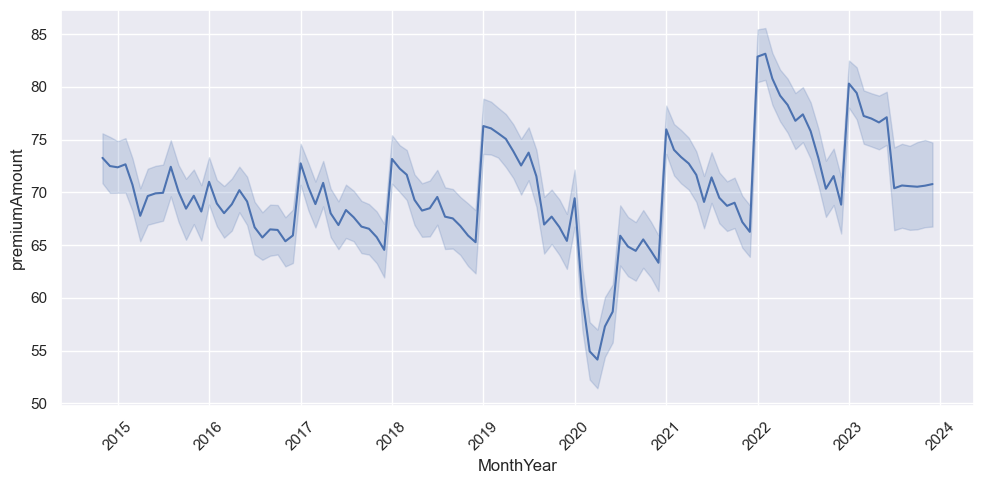

In [258]:
plt.figure(figsize=(10,5))
sns.lineplot(x='MonthYear',y='premiumAmount',data=df_sorted)
plt.xticks(rotation=45)
plt.tight_layout();

In [259]:
last_3_years = df_sorted[(df_sorted['MonthYear']>'2014') & (df_sorted['MonthYear']<'2024')]

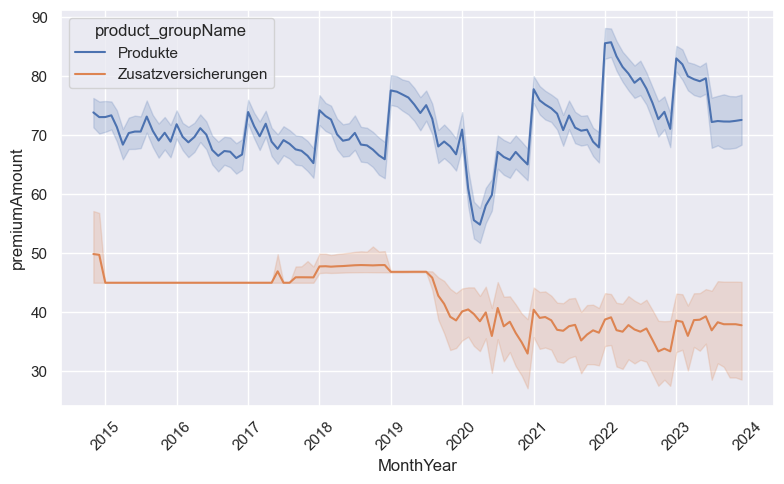

In [260]:
plt.figure(figsize=(8,5))
sns.lineplot(x='MonthYear',y='premiumAmount',data=last_3_years,hue='product_groupName')
plt.xticks(rotation=45)
plt.tight_layout();